In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#Part A - 30 Marks


• DOMAIN: Medical

• CONTEXT: Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. 
Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for 
developing a AIML model which can predict the condition of the patient depending on the received test results.

• DATA DESCRIPTION: The data consists of biomechanics features of the patients according to their current conditions. Each patient is 
represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part. 

• PROJECT OBJECTIVE: To Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

• STEPS AND TASK [30 Marks]:

  1. Data Understanding: [5 Marks]


A. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]


In [172]:
from google.colab import drive
drive.mount("/content/drive")
data_normal=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Normal.csv")
data_type_h=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Type_H.csv")
data_type_s=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Type_S.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


B. Print Shape and columns of all the 3 DataFrames. [1 Mark]


In [173]:
print(data_normal.shape)
print(data_normal.columns)

(100, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [174]:
print(data_type_h.shape)
print(data_type_h.columns)

(60, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


In [175]:
print(data_type_s.shape)
print(data_type_s.columns)

(150, 7)
Index(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius', 'S_Degree',
       'Class'],
      dtype='object')


C. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]


In [176]:
#First we will compare columns of dataframe type h and type s
print(data_type_h.columns.equals(data_type_s.columns))

True


In [177]:
#As the result shows columns of dataframe type h and type s are same 
#Now we will compare columns of dataframe type s and normal
print(data_type_s.columns.equals(data_normal.columns))

True


In [178]:
#columns of dataframe type s and normal are also same so we now write our observation
#Observation:- Column names of all the 3 DataFrames(Type_s,Type_h,Normal) are same

D. Print DataTypes of all the 3 DataFrames. [1 Mark]


In [179]:
data_normal.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [180]:
data_type_h.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [181]:
data_type_s.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [182]:
#As we can see all the three dataframes have same columns and all the columns have same datatype(ie. Float) except a column named 'Class' it's datatype is Object.

E. Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]

2. Data Preparation and Exploration: [5 Marks]

    A. Unify all the variations in ‘Class’ feature for all the 3 DataFrames.    [1Marks]

    For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’



In [183]:
data_type_h['Class']=data_type_h['Class'].replace(('tp_h','Type_H'),'type_h')
data_normal['Class']=data_normal['Class'].replace(('Normal','Nrmal'),'normal')
data_type_s['Class']=data_type_s['Class'].replace(('tp_s','Type_S'),'type_s')

B. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]
Checkpoint: Expected Output shape = (310,7)


In [184]:
data_frames=[data_normal,data_type_s,data_type_h]
data_final=pd.concat(data_frames)
data_final.shape
data_final.reset_index(inplace=True)
data_final.head(200)

,index,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,normal
1,1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,normal
2,2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,normal
3,3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,normal
4,4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,normal
...,...,...,...,...,...,...,...,...
195,95,66.804796,14.551602,72.084912,52.253195,82.456038,41.685474,type_s
196,96,79.476978,26.732268,70.650982,52.744711,118.588669,61.700598,type_s
197,97,44.216464,1.507075,46.110339,42.709390,108.629567,42.810481,type_s
198,98,57.035097,0.345728,49.198003,56.689369,103.048698,52.165145,type_s



C. Print 5 random samples of this DataFrame [1 Marks]



In [185]:
data_final.sample(5)

,index,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
307,57,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,type_h
77,77,33.041688,-0.324678,19.071075,33.366366,120.388611,9.354365,normal
125,25,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315,type_s
63,63,35.877571,1.112374,43.457257,34.765197,126.923906,-1.632238,normal
235,135,71.241764,5.268270,85.999584,65.973493,110.703107,38.259864,type_s


D. Print Feature-wise percentage of Null values. [1 Mark]



In [186]:
data_final.isnull().sum()/len(data_final)

index          0.0
P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

E. Check 5-point summary of the new DataFrame. [1 Mark]

In [187]:
q1=data_final.quantile(0.25)
q1

index           25.250000
P_incidence     46.430294
P_tilt          10.667069
L_angle         37.000000
S_slope         33.347122
P_radius       110.709196
S_Degree         1.603727
Name: 0.25, dtype: float64

            index  P_incidence      P_tilt     L_angle     S_slope  \
count  310.000000   310.000000  310.000000  310.000000  310.000000   
mean    57.725806    60.496653   17.542822   51.930930   42.953831   
std     39.385724    17.236520   10.008330   18.554064   13.423102   
min      0.000000    26.147921   -6.554948   14.000000   13.366931   
25%     25.250000    46.430294   10.667069   37.000000   33.347122   
50%     51.000000    58.691038   16.357689   49.562398   42.404912   
75%     85.750000    72.877696   22.120395   63.000000   52.695888   
max    149.000000   129.834041   49.431864  125.742385  121.429566   

         P_radius    S_Degree  
count  310.000000  310.000000  
mean   117.920655   26.296694  
std     13.317377   37.559027  
min     70.082575  -11.058179  
25%    110.709196    1.603727  
50%    118.268178   11.767934  
75%    125.467674   41.287352  
max    163.071041  418.543082  


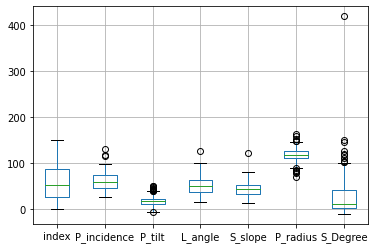

In [188]:
print(data_final.describe())
data_final.boxplot()

3Data Analysis: [10 Marks]

A. Visualize a heatmap to understand correlation between all features [2 Marks]



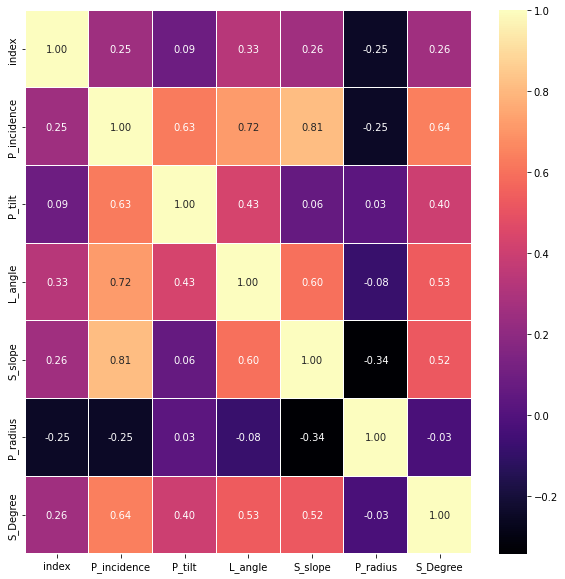

In [189]:
fig,ax = plt.subplots(figsize=(10, 10)) 
sns.heatmap(data_final.corr(), ax=ax, annot=True, linewidths=0.05, fmt='.2f',cmap="magma");

B. Share insights on correlation. [2 Marks]

  A. Features having stronger correlation with correlation value.


In [190]:
# P_incidence and S_slope are highely correlated.

B. Features having weaker correlation with correlation value.


In [191]:
#P_radius and S_slope have weaker correlation

C. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]


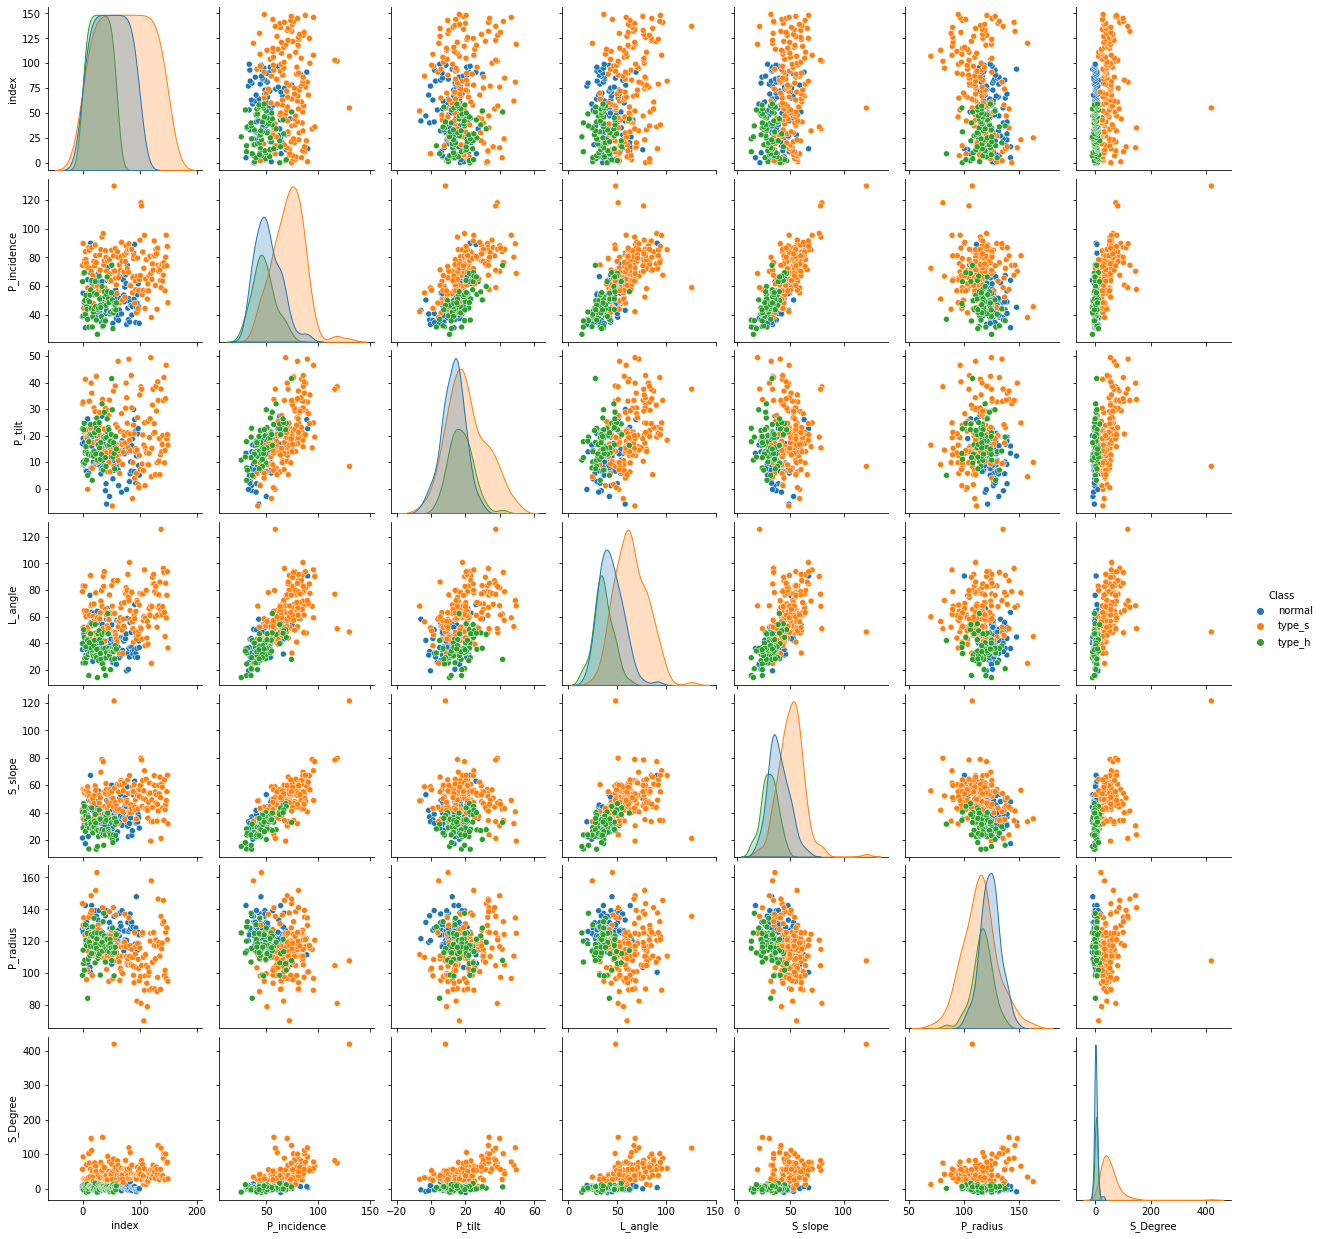

In [192]:
sns.pairplot(data_final,hue='Class')
plt.show()
# Observations: 

# Along the diagonal we can see the distribution of individual variable

# P_incidence has postive realtionship with all variables except P_radius. Relationship is higher for S_slope and L_angle

# P_tilt has Higher Relationship with P_incidence and L_angle.There is no Relationship with s_slope and p_radius

# L_angle has postive Relationship with p_tilt,s_slope and s_degree. It has no Relationship with P_radius

# s_slope has positive Relationship with L_angle and s_degree

# p_radius has no Relationship with s_degree,p_tilt,l_angle.

# S_degree has no strong positive Relationship with any of the variables.

D. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]


<Figure size 1080x360 with 0 Axes>

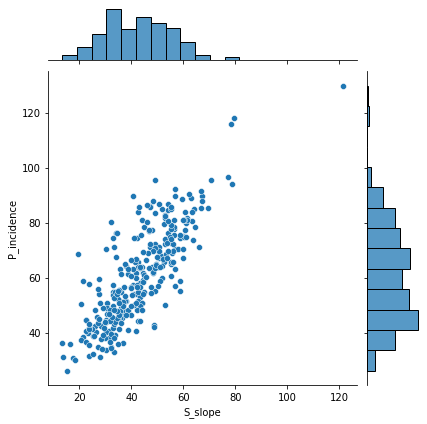

In [193]:
plt.figure(figsize=(15,5))
sns.jointplot(x='S_slope', y='P_incidence', data=data_final)

In [194]:
#Insight:-
#1. P_incidence and S_slope both are  directly proportional to each other.
#2. The plot is positively skewed.
#3. From the plot we can say that P_incidence and S_slope both are increasing constantly.
#4. We can also say that P_incidence and S_slope are positively correlated.

E. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]

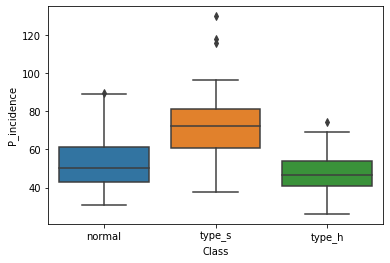

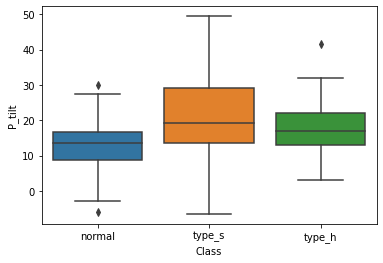

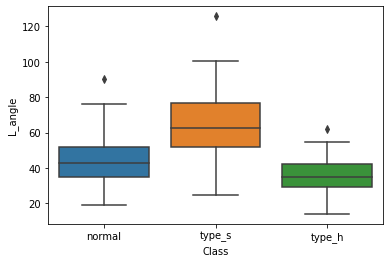

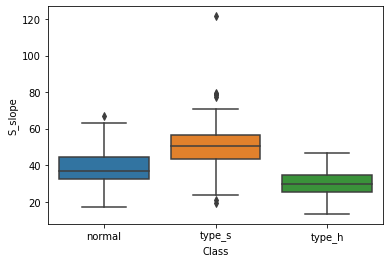

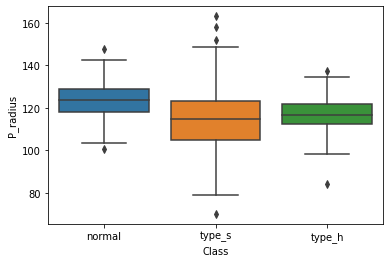

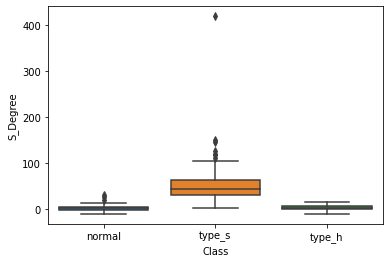

In [195]:
columns = ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']

for column in columns:
 sns.boxplot(x='Class', y=column, data= data_final)
 plt.show()

In [196]:
#Observations:
#1. P_incidence is higher for Type_S class value and has higher no of outliers
#2. P_tilt has no outlers for Type_S class value.
#3. L_angle is higher for Type_S class value and has outliers across all class values.
#4. S_slope has very high no of outliers for Type_S class value.

4. Model Building: [6 Marks]

A. Split data into X and Y. [1 Marks]


In [197]:
x = data_final.drop("Class",axis=1)
y = data_final["Class"]

In [198]:
XScaled  = x.apply(zscore)

B. Split data into train and test with 80:20 proportion. [1 Marks]


In [199]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

C. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]


In [200]:
knn = KNeighborsClassifier(n_neighbors = 5,metric='manhattan')
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

D. Print all the possible performance metrics for both train and test data. [2 Marks]

In [201]:
print('KNN classifier - Accuracy on Training data:',knn.score(x_train, y_train))
print('KNN classifier - Accuracy on on Test data:',knn.score(x_test, y_test))

KNN classifier - Accuracy on Training data: 0.9233870967741935
KNN classifier - Accuracy on on Test data: 0.8225806451612904


In [202]:
# Observations:
# 1. 89.11% accuracy on training set and 87.09% accuracy on test data.
# 2. It seems model is overfit on traning data. we need to identify the optimal value of K.
print(knn_pred)

['type_s' 'normal' 'type_s' 'type_s' 'type_s' 'normal' 'normal' 'normal'
 'normal' 'type_s' 'type_s' 'type_s' 'normal' 'type_h' 'type_s' 'type_h'
 'type_h' 'type_s' 'type_s' 'type_s' 'type_h' 'type_s' 'type_s' 'normal'
 'normal' 'type_s' 'type_s' 'type_s' 'type_h' 'type_s' 'type_s' 'type_s'
 'type_s' 'type_h' 'type_s' 'type_s' 'type_h' 'normal' 'normal' 'normal'
 'normal' 'type_s' 'type_s' 'type_h' 'type_h' 'type_s' 'type_h' 'type_s'
 'normal' 'normal' 'type_h' 'type_s' 'type_s' 'type_s' 'type_h' 'type_s'
 'type_h' 'normal' 'type_h' 'normal' 'normal' 'type_h']


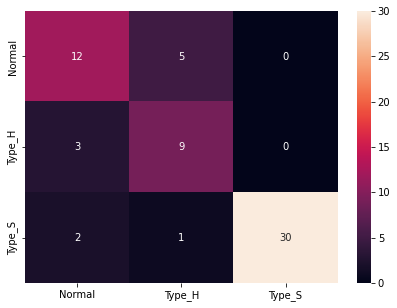

In [203]:
cm = confusion_matrix(y_test,knn_pred)

df_cm = pd.DataFrame(cm, index = [i for i in ["Normal","Type_H","Type_S"]],columns = [i for i in ["Normal","Type_H","Type_S"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

In [204]:
print("classification  Matrix:\n",classification_report(y_test,knn_pred))

classification  Matrix:
               precision    recall  f1-score   support

      normal       0.71      0.71      0.71        17
      type_h       0.60      0.75      0.67        12
      type_s       1.00      0.91      0.95        33

    accuracy                           0.82        62
   macro avg       0.77      0.79      0.77        62
weighted avg       0.84      0.82      0.83        62



5. Performance Improvement: [4 Marks]

A. Experiment with various parameters to improve performance of the base model. [2 Marks]

(Optional: Experiment with various Hyperparameters - Research required)


The optimal number of neighbors is  13


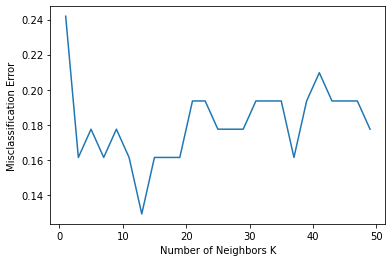

In [205]:
# creating odd list of K for KNN
myList = list(range(1,50))
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))
# empty list that will hold accuracy scores
ac_scores = []
# perform accuracy metrics for values from 1,2....50
for k in neighbors:
  knn = KNeighborsClassifier(n_neighbors=k,weights = 'distance')
  knn.fit(x_train, y_train)
  # predict the response
  y_pred = knn.predict(x_test)
  # evaluate accuracy
  scores = accuracy_score(y_test, y_pred)
  ac_scores.append(scores)
 
# changing to misclassification error
MSE = [1 - x for x in ac_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is " ,optimal_k)
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


B. Clearly showcase improvement in performance achieved. [1 Marks]

For Example:

A. Accuracy: +15% improvement

B. Precision: +10% improvement.


In [206]:
# Calculating accuracy and score for optimalK=13
knn = KNeighborsClassifier(n_neighbors=13)
# fitting the model
knn.fit(x_train, y_train)
# predict the response
y_pred = knn.predict(x_test)
print('KNN classifier - Accuracy on Training data:',knn.score(x_train, y_train))
print('KNN classifier - Accuracy on on Test data:',knn.score(x_test, y_test))
# Observations:
# 1. 88.7% accuracy on training set and 85.5% accuracy on test data.


KNN classifier - Accuracy on Training data: 0.8870967741935484
KNN classifier - Accuracy on on Test data: 0.8548387096774194


C. Clearly state which parameters contributed most to improve model performance. [1 Marks]

In [207]:
#k=13 is the optimal value for k and it contributed the most.

# Part B - 30 Mark



DOMAIN: Banking, Marketing

• CONTEXT: A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee majority of them are 
liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more 
business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation 
being the core strength of the business strategy, marketing department wants to devise effective campaigns with better target marketing to 
increase the conversion ratio to double digit with same budget as per last campaign. 

• DATA DICTIONARY:
1. Team: Team’s name
2. ID: Customer ID
3. Age: Customer’s approximate age.
4. CustomerSince: Customer of the bank since. [unit is masked]
5. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
6. ZipCode: Customer’s zip code.
7. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
8. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
9. Level: A level associated to the customer which is masked by the bank as an IP.
10. Mortgage: Customer’s mortgage. [unit is masked]
11. Security: Customer’s security asset with the bank. [unit is masked]
12. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
13. InternetBanking: if the customer uses internet banking.
14. CreditCard: if the customer uses bank’s credit card.
15. LoanOnCard: if the customer has a loan on credit card.

• PROJECT OBJECTIVE: Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert 
using the historical dataset.
• STEPS AND TASK [30 Marks]:



1. Data Understanding and Preparation: [5 Marks]

A. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]


In [208]:
data1=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data1.csv")
data2=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data2.csv")

B. Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks]


In [209]:
print(data1.shape)
print(data1.columns)
print(data1.dtypes)

(5000, 8)
Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')
ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object


In [210]:
print(data2.shape)
print(data2.columns)
print(data2.dtypes)

(5000, 7)
Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')
ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object


C. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]


In [211]:
bank_df = pd.merge(data1,data2, on='ID', how='outer')

D. Change Datatype of below features to ‘Object’ [1 Marks]
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.

[Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.]

In [212]:
categorical_cols=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard']
for i in categorical_cols:
 bank_df[i]=bank_df[i].astype('object')
bank_df.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

In [213]:
bank_df.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


2. Data Exploration and Analysis: [5 Marks]

A. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]

In [214]:
bank_df.columns
column_all=['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode','MonthlyAverageSpend', 'Level', 'Mortgage']

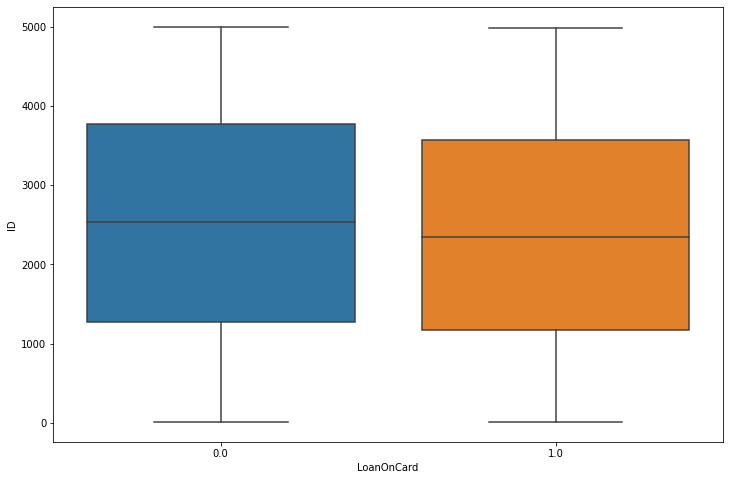

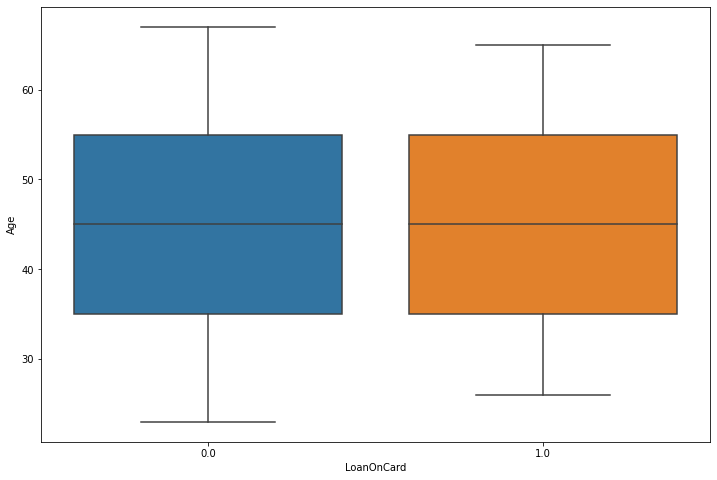

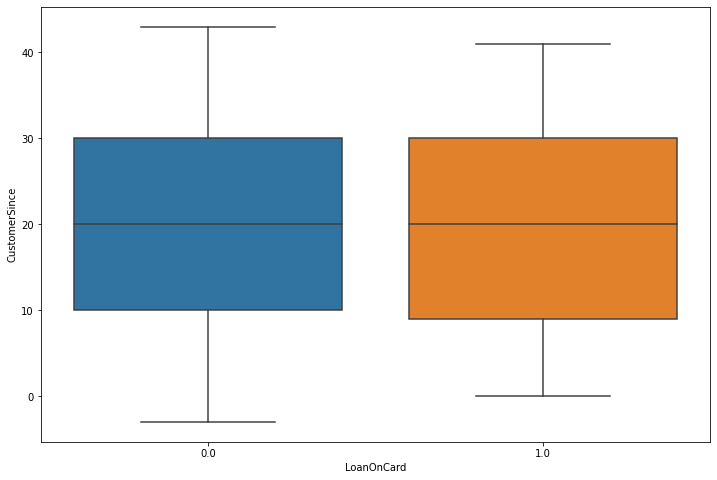

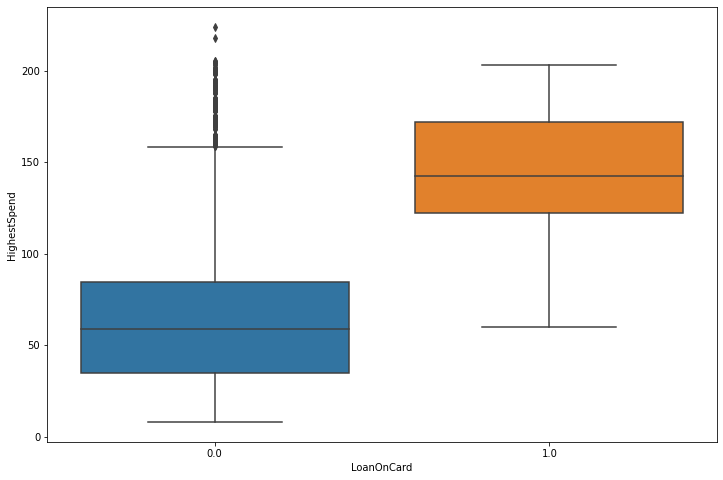

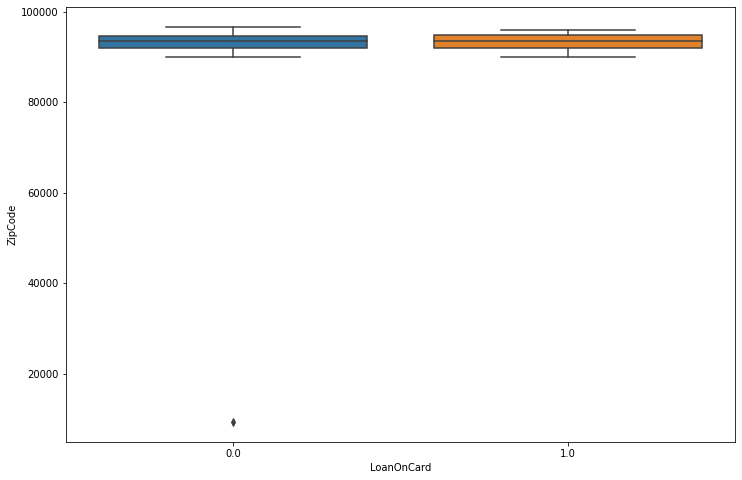

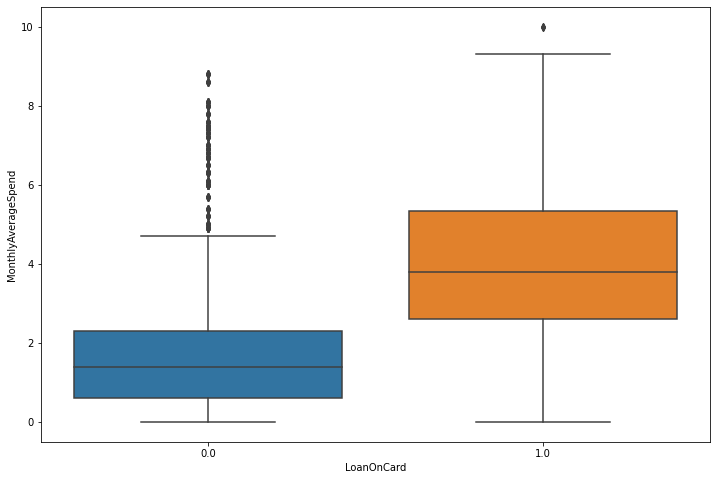

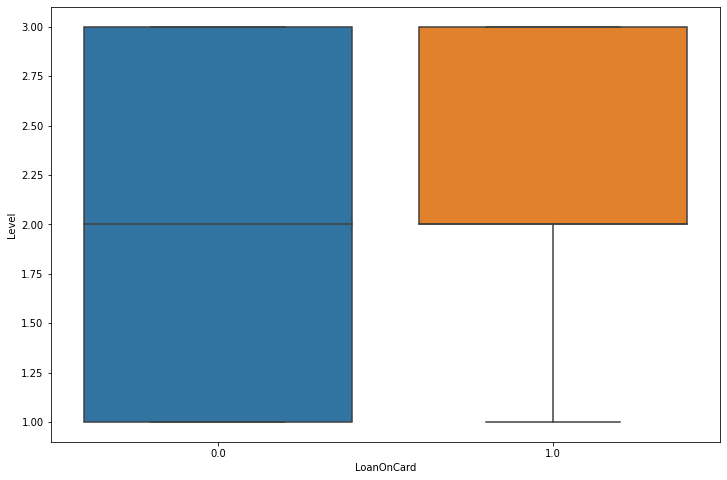

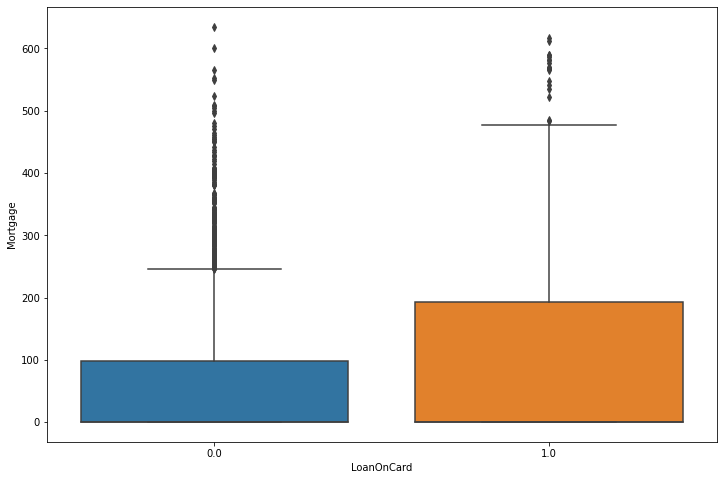

In [215]:
for column in column_all:
  plt.figure(figsize=(12,8))
  sns.boxplot(x='LoanOnCard', y=column, data= bank_df)
  plt.show()

B. Check the percentage of missing values and impute if required. [1 Marks]

C. Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]

[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment ]


In [216]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 715.0+ KB


In [217]:
(bank_df.isnull().sum()/len(bank_df))*100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

In [218]:
# Drop null values from LoanOnCard attribute 
# Loanoncard has 5000 rows in which 20 are null values which is 0.4%
bank_df.dropna(axis=0,inplace=True)
bank_df.isna().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [219]:
# Seperate categorical columns
categorical_cols=['HiddenScore','Level','Security','FixedDepositAccount','InternetBanking', 'CreditCard', 'LoanOnCard']
# Changing datatypes of categorical features
for i in categorical_cols:
 bank_df[i]=bank_df[i].astype('category')
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4980 entries, 9 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   4980 non-null   int64   
 1   Age                  4980 non-null   int64   
 2   CustomerSince        4980 non-null   int64   
 3   HighestSpend         4980 non-null   int64   
 4   ZipCode              4980 non-null   int64   
 5   HiddenScore          4980 non-null   category
 6   MonthlyAverageSpend  4980 non-null   float64 
 7   Level                4980 non-null   category
 8   Mortgage             4980 non-null   int64   
 9   Security             4980 non-null   category
 10  FixedDepositAccount  4980 non-null   category
 11  InternetBanking      4980 non-null   category
 12  CreditCard           4980 non-null   category
 13  LoanOnCard           4980 non-null   category
dtypes: category(7), float64(1), int64(6)
memory usage: 346.2 KB


In [220]:
bank_df['CustomerSince'].head(20)

9      9
10    39
11     5
12    23
13    32
14    41
15    30
16    14
17    18
18    21
19    28
20    31
21    27
22     5
23    18
24    11
25    19
26    16
27    20
28    30
Name: CustomerSince, dtype: int64

3. Data Preparation and model building: [10 Marks]

A. Split data into X and Y. [1 Marks]

[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]


In [221]:
x=bank_df.drop(["ZipCode","ID","LoanOnCard"],axis=1)
y=bank_df["LoanOnCard"]

B. Split data into train and test. Keep 25% data reserved for testing. [1 Marks]


In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(3735, 11)
(3735,)
(1245, 11)
(1245,)


C. Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]


In [223]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)
predict=classifier.predict(x_test)
y_pred = classifier.predict(x_test)
print(y_pred)


[0. 0. 0. ... 0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [224]:
print('Accuracy on Training data:',classifier.score(x_train, y_train) )
print('Accuracy on Test data:',classifier.score(x_test, y_test) )

Accuracy on Training data: 0.9502008032128514
Accuracy on Test data: 0.944578313253012


In [225]:
#95.02% accuracy on training set and 94.45% accuracy on test set.
#Here training set accuracy and testing accuracy are balanced when model is built without sampling also accuracy is good

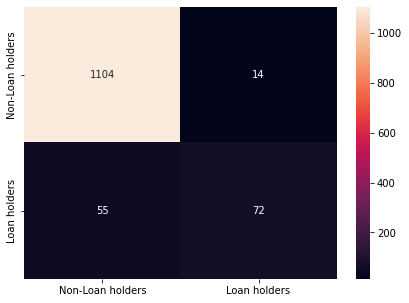

In [226]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

D. Print evaluation metrics for the model and clearly share insights. [1 Marks]

In [227]:
print("classification  Matrix:\n",classification_report(y_test,y_pred))

classification  Matrix:
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1118
         1.0       0.84      0.57      0.68       127

    accuracy                           0.94      1245
   macro avg       0.89      0.78      0.82      1245
weighted avg       0.94      0.94      0.94      1245



In [228]:
#Insights 

E. Balance the data using the right balancing technique. [2 Marks]

i. Check distribution of the target variable

ii. Say output is class A : 20% and class B : 80%

iii. Here you need to balance the target variable as 50:50.

iv. Try appropriate method to achieve the same.



In [229]:
smote_nc=SMOTENC(categorical_features=[3,5,7,8,9,0],random_state=1) #specifying categorical column numbers
x_s,y_s=smote_nc.fit_resample(x,y)

In [230]:
print('Before sampling:')
print(y.value_counts())

Before sampling:
0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64


In [231]:
print('After sampling:')
print(y_s.value_counts())

After sampling:
0.0    4500
1.0    4500
Name: LoanOnCard, dtype: int64


F. Again train the same previous model on balanced data. [1 Marks]


In [232]:
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.25, random_state=10)

In [233]:
X_train.dropna(axis=1,inplace=True)
X_test.dropna(axis=1,inplace=True)

In [234]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
logit_pred = logit.predict(X_test)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [235]:
print('Accuracy on Training data:',logit.score(X_train, y_train) )
print('Accuracy on Test data:',logit.score(X_test, y_test) )

Accuracy on Training data: 0.8768888888888889
Accuracy on Test data: 0.8724444444444445


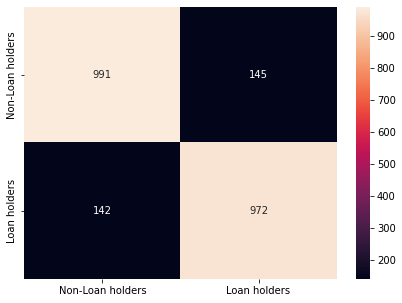

In [236]:
cm = confusion_matrix(y_test, logit_pred, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],columns = [i for i in ["Non-Loan holders","Loan holders"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
plt.show()

G. Print evaluation metrics and clearly share differences observed. [2 Marks]

In [237]:
print("classification  Matrix:")
print(classification_report(y_test,logit_pred))

classification  Matrix:
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1136
         1.0       0.87      0.87      0.87      1114

    accuracy                           0.87      2250
   macro avg       0.87      0.87      0.87      2250
weighted avg       0.87      0.87      0.87      2250



4. Performance Improvement: [10 Marks]

A. Train a base model each for SVM, KNN. [4 Marks]


KNN Model


In [238]:
knn = KNeighborsClassifier(n_neighbors = 5,metric='manhattan')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
print('KNN classifier - Accuracy on Training data:',knn.score(X_train, y_train))
print('KNN classifier - Accuracy on on Test data:',knn.score(X_test, y_test))
cm = confusion_matrix(y_test,knn_pred)

KNN classifier - Accuracy on Training data: 0.9631111111111111
KNN classifier - Accuracy on on Test data: 0.9502222222222222


In [239]:
NNH = KNeighborsClassifier(n_neighbors= 5)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

         0.0       0.97      0.90      0.93      1136
         1.0       0.90      0.97      0.94      1114

    accuracy                           0.93      2250
   macro avg       0.94      0.93      0.93      2250
weighted avg       0.94      0.93      0.93      2250



SVM Model

In [240]:
clf = svm.SVC(gamma=0.025, C=3)   
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
svc_train_accuracy = clf.score(X_train, y_train)
svc_test_accuracy = clf.score(X_test, y_test)

In [241]:
print(f'svc training accuracy {svc_train_accuracy*100}')
print(f'svc testing accuracy {svc_test_accuracy*100}')

svc training accuracy 99.18518518518519
svc testing accuracy 96.75555555555555


In [242]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      1136
         1.0       0.96      0.97      0.97      1114

    accuracy                           0.97      2250
   macro avg       0.97      0.97      0.97      2250
weighted avg       0.97      0.97      0.97      2250



B. Tune parameters for each of the models wherever required and finalize a model. [3 Marks]

(Optional: Experiment with various Hyperparameters - Research required)


KNN Model Tuning

In [243]:
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k)
    NNH.fit(X_train, y_train)
    scores.append(NNH.score(X_test, y_test))
    

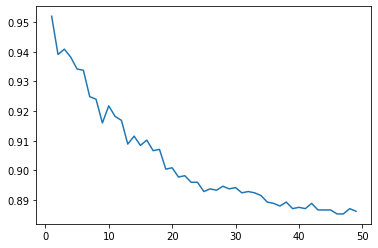

In [244]:
plt.plot(range(1,50),scores);

In [245]:
NNH = KNeighborsClassifier(n_neighbors= 12)
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.9168888888888889

In [246]:
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.91      1136
         1.0       0.88      0.96      0.92      1114

    accuracy                           0.92      2250
   macro avg       0.92      0.92      0.92      2250
weighted avg       0.92      0.92      0.92      2250



SVM Model Tuning

In [247]:
# train the model on train set
model = SVC()
model.fit(X_train, y_train)
  
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.82      0.87      1136
         1.0       0.84      0.92      0.88      1114

    accuracy                           0.87      2250
   macro avg       0.88      0.87      0.87      2250
weighted avg       0.88      0.87      0.87      2250



In [248]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=   2.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=   2.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=   2.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=   2.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=   2.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.752 total time=   2.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   2.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=   2.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.770 total time=   2.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.748 total time=   2.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.861 total time=   1.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [249]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print(grid.best_score_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.001)
0.9668148148148148


In [250]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1136
         1.0       0.97      0.98      0.97      1114

    accuracy                           0.97      2250
   macro avg       0.97      0.97      0.97      2250
weighted avg       0.97      0.97      0.97      2250



In [251]:
#We have got almost 97 % prediction result

C. Print evaluation metrics for final model. [1 Marks]


In [252]:
print(classification_report(y_test,predicted_labels))

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.91      1136
         1.0       0.88      0.96      0.92      1114

    accuracy                           0.92      2250
   macro avg       0.92      0.92      0.92      2250
weighted avg       0.92      0.92      0.92      2250



D. Share improvement achieved from base model to final model. [2 Marks]

In [253]:
#We are selecting final model as logistic regression as it performs well in training and testing test.

#Logistic Regression is not affected by overfitting and it is also has good recall value.

#Deviation also less in logistic regression.

#Sampling improved to predict minority classes as well

#Suggesting to collect data equally for both the classes.

#Few customers does't have credit card but those customer having loan on card. This data error can be avoided